# Smart Quality Monitoring & Analytics System

This project visualizes manufacturing quality metrics through a Tableau dashboard powered by a dual-mode data pipeline. Users can operate in manual mode (CSV import) or automatic mode (Python-generated data).

### Import libraries

In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV file

In [111]:
df_quality_data = pd.read_csv('manufacturing_defect_dataset.csv')
df_quality_data.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
5,171,6975.931602,95.331919,1,3.914574,92.568436,19,3.027324,7.930009,0.074069,87.079118,7,1238.994421,0.118021,7.279442,171.711804,1
6,800,15889.698650,99.325486,3,4.789000,90.729911,10,3.559561,3.046889,0.040192,91.063158,8,3138.431150,0.333913,4.891669,188.727737,1
7,120,17266.779948,99.401489,4,0.743605,92.119681,13,1.604879,8.380972,0.009702,88.705569,3,1004.108554,0.293422,9.333835,312.526896,1
8,714,8202.670495,97.301422,5,3.185856,95.172937,2,3.494920,3.668747,0.058433,94.298961,4,4150.875773,0.366683,5.517451,215.680921,1
9,221,12587.790394,92.015843,2,2.425283,97.507284,0,2.633960,5.933418,0.032955,85.316362,6,3023.891555,0.317071,5.965972,364.638176,0


In [112]:
df_quality_data.tail()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0
3239,355,13563.605806,83.595956,2,2.705502,94.630965,13,4.803394,5.830580,0.052978,86.010046,4,2610.526736,0.206099,2.312373,324.825754,0


# Data cleaning

Checking for null values

In [113]:
df_quality_data.isnull().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

In [114]:
df_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [115]:
df_quality_data.shape

(3240, 17)

In [116]:
df_quality_data.describe()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


###  making Copy to add Batch Indexing for plotting

In [117]:
df = df_quality_data.copy()

### Add a Batch Index for plotting

In [118]:
#df['BatchIndex'] = df.index // 10
df['BatchIndex'] = range(1,len(df)+1) 

In [119]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus,BatchIndex
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1,2
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1,3
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1,4
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1,5


### Add Date, Shift & BatchID Columns

In [120]:
# Add a Synthetic Date Column

# Simulate one data point per day starting from Jan 1, 2020
# adjust the frequency if needed (e.g., 'H' for hourly or 'W' for weekly)
df_quality_data['Date'] = pd.date_range(start='2020-01-01',periods=len(df_quality_data),freq='D')

# Add a Shift Column
# Simulate factory shifts (1, 2, 3) repeating for each record
shifts = ['Shift 1', 'Shift 2', 'Shift 3']
df_quality_data['Shift'] = [shifts[i % 3] for i in range(len(df_quality_data))]

# Add a BatchID Column
# Create unique batch IDs like BATCH_1000, BATCH_1001, etc.
df_quality_data['BatchID'] = [f"BATCH_{1000 + i}" for i in range(len(df_quality_data))]


# Final Check

print("After Enhancement:\n", df_quality_data.head(10))
print("\nColumns now available for EDA and Dashboard:")
print(df_quality_data.columns.tolist())


After Enhancement:
    ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   
5               171     6975.931602        95.331919              1   
6               800    15889.698650        99.325486              3   
7               120    17266.779948        99.401489              4   
8               714     8202.670495        97.301422              5   
9               221    12587.790394        92.015843              2   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.9

In [121]:
df_quality_data.isnull().sum()  

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
Date                    0
Shift                   0
BatchID                 0
dtype: int64

In [122]:
df_quality_data.describe().T

,count,mean,min,25%,50%,75%,max,std
ProductionVolume,3240.0,548.523148,100.0,322.0,549.0,775.25,999.0,262.402073
ProductionCost,3240.0,12423.018476,5000.174521,8728.82928,12405.204656,16124.462428,19993.365549,4308.051904
SupplierQuality,3240.0,89.83329,80.00482,84.869219,89.704861,94.789936,99.989214,5.759143
DeliveryDelay,3240.0,2.558951,0.0,1.0,3.0,4.0,5.0,1.705804
DefectRate,3240.0,2.749116,0.50071,1.598033,2.708775,3.904533,4.998529,1.310154
QualityScore,3240.0,80.134272,60.010098,70.10342,80.265312,90.353822,99.996993,11.61175
MaintenanceHours,3240.0,11.476543,0.0,5.75,12.0,17.0,23.0,6.872684
DowntimePercentage,3240.0,2.501373,0.001665,1.264597,2.465151,3.774861,4.997591,1.443684
InventoryTurnover,3240.0,6.019662,2.001611,3.983249,6.022389,8.050222,9.998577,2.329791
StockoutRate,3240.0,0.050878,0.000002,0.0262,0.051837,0.075473,0.099997,0.028797


# KPI's calculation

In [123]:
kpis = {
"Total Production Volume": df['ProductionVolume'].sum(),
"Total Production Cost": df['ProductionCost'].sum(),
"Average Defect Rate": df['DefectRate'].mean(),
"Average Quality Score": df['QualityScore'].mean(),
"Total Maintenance Hours": df['MaintenanceHours'].sum(),
"Average Downtime (%)": df['DowntimePercentage'].mean(),
"Average Worker Productivity": df['WorkerProductivity'].mean(),
"Total Safety Incidents": df['SafetyIncidents'].sum(),
"Average Energy Efficiency": df['EnergyEfficiency'].mean(),
"Total Additive Material Cost": df['AdditiveMaterialCost'].sum()
}

print('Key KPIs')
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")


Key KPIs
Total Production Volume: 1777215.00
Total Production Cost: 40250579.86
Average Defect Rate: 2.75
Average Quality Score: 80.13
Total Maintenance Hours: 37184.00
Average Downtime (%): 2.50
Average Worker Productivity: 90.04
Total Safety Incidents: 14877.00
Average Energy Efficiency: 0.30
Total Additive Material Cost: 970430.15


### Save CSV dataset for Tableau

In [124]:
df.to_csv("dashboard_data.csv", index=False)

### EDA

Distribution of Defect Rate

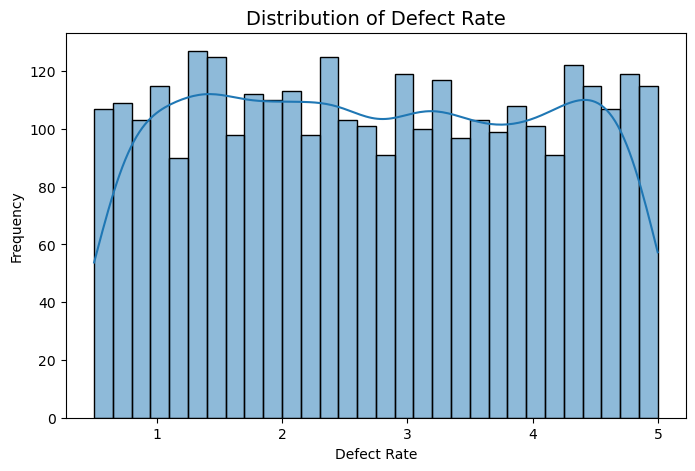

In [125]:
#A left-skewed curve means most production runs have low defects (good).
# A right-skewed curve means many runs have high defects (problematic).
plt.figure(figsize=(8, 5))
sns.histplot(df_quality_data['DefectRate'], kde=True, bins=30)
plt.title("Distribution of Defect Rate", fontsize=14)
plt.xlabel("Defect Rate")
plt.ylabel("Frequency")
plt.show()


Defect Rate Over Time

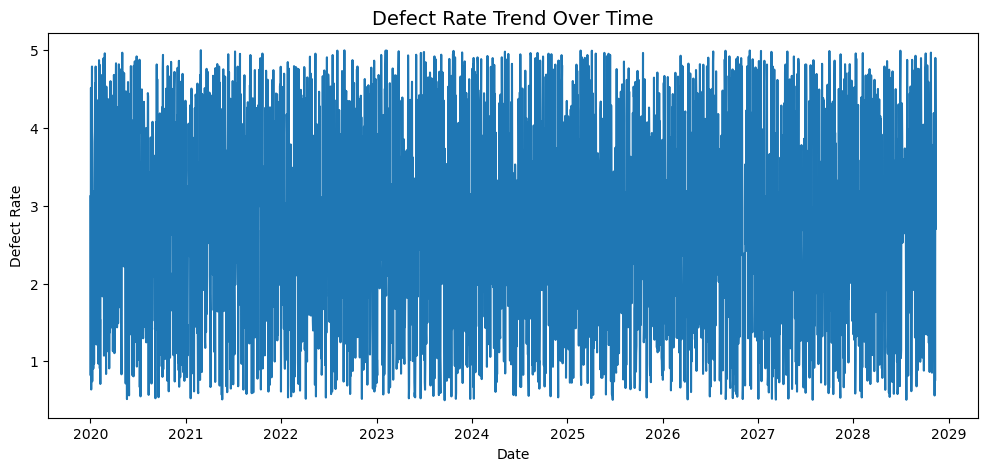

In [126]:
# A downward trend = process improvement.
# Upward trend = investigate root cause or shift

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_quality_data, x='Date', y='DefectRate')
plt.title("Defect Rate Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Defect Rate")
plt.show()


Defect Rate by Shift

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_26832/2810868950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_quality_data, x='Shift', y='DefectRate', palette='Set2')


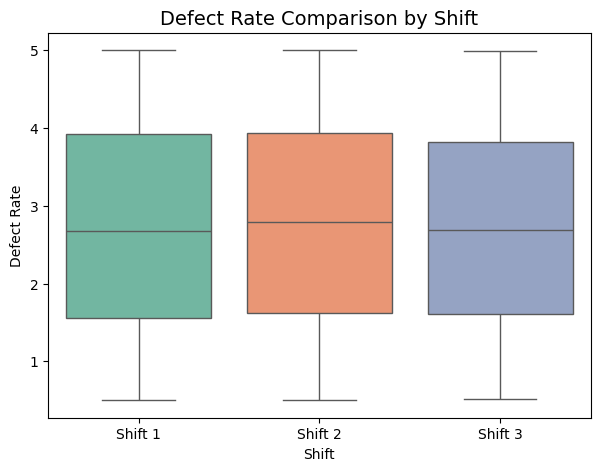

In [127]:
#  Shift 2 has a higher median defect rate, it may indicate training, fatigue, or process consistency issues.
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_quality_data, x='Shift', y='DefectRate', palette='Set2')
plt.title("Defect Rate Comparison by Shift", fontsize=14)
plt.xlabel("Shift")
plt.ylabel("Defect Rate")
plt.show()

Relationship Between Key Metrics(Correlation Heatmap)

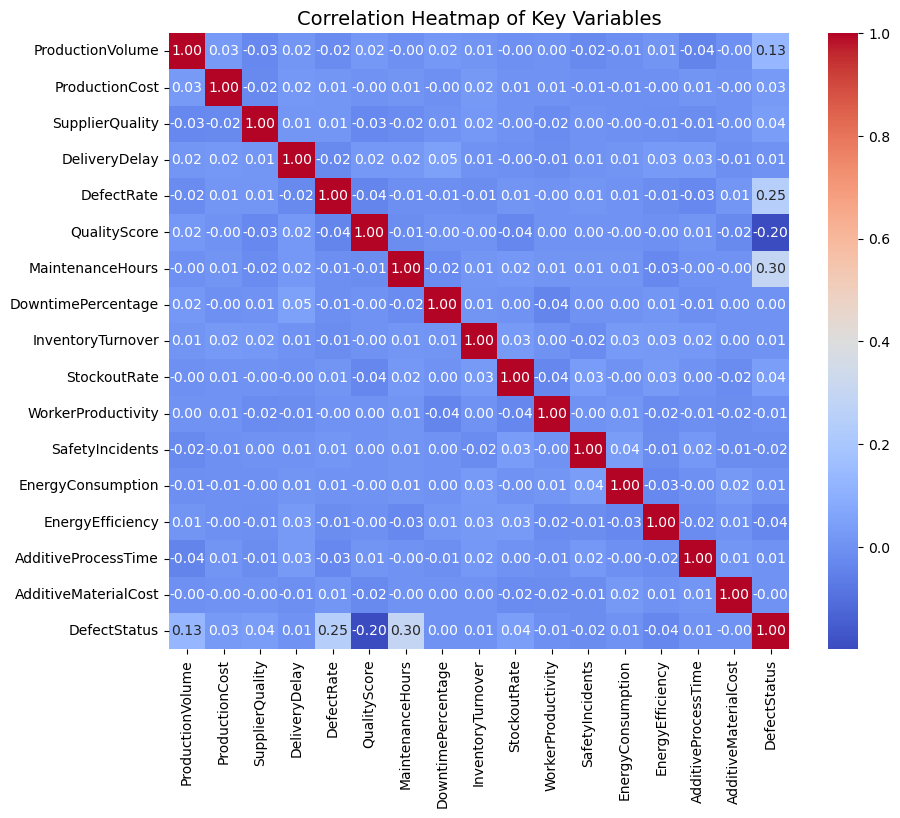

In [128]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_quality_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Variables", fontsize=14)
plt.show()

Worker Productivity vs Quality Score

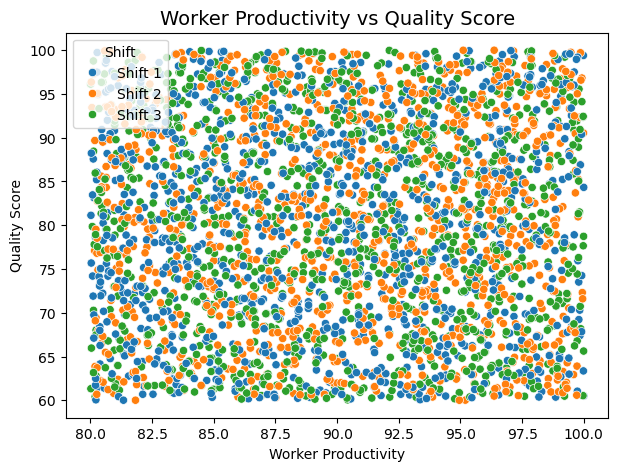

In [129]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_quality_data, x='WorkerProductivity', y='QualityScore',hue='Shift')
plt.title("Worker Productivity vs Quality Score", fontsize=14)
plt.xlabel("Worker Productivity")
plt.ylabel("Quality Score")
plt.show()

Energy Efficiency Analysis


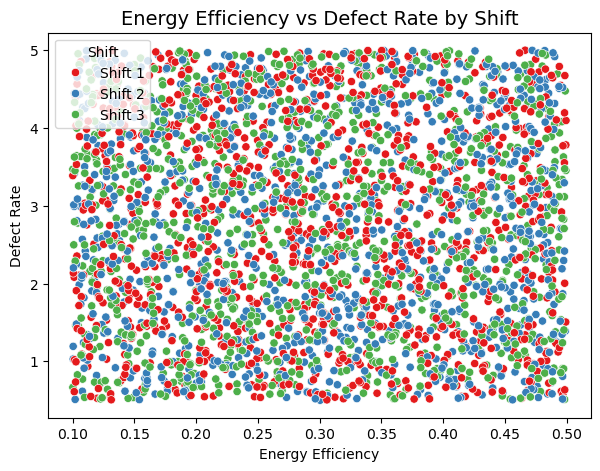

In [130]:
# Lower defect rates with higher energy efficiency -> optimized process.
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_quality_data, x='EnergyEfficiency', y='DefectRate', hue='Shift', palette='Set1')
plt.title("Energy Efficiency vs Defect Rate by Shift", fontsize=14)
plt.xlabel("Energy Efficiency")
plt.ylabel("Defect Rate")
plt.show()

## EDA with meaningful hypothesis:

Does higher production volume increase the defect rate?

Do more maintenance hours reduce downtime?

Is supplier quality affecting product defect rate?

Do more safety incidents correlate with lower worker productivity?

Does energy efficiency improve quality?

### Hypothesis 1: Higher Production Volume increases Defect Rate

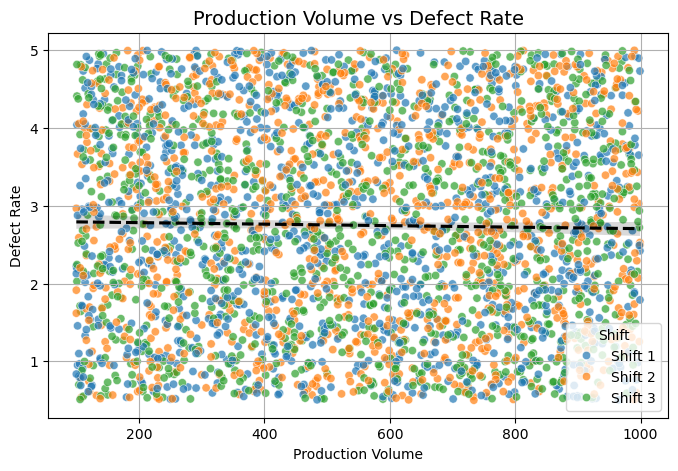

In [131]:
# If the regression line slopes upward → more production = more defects (possible overstrain).
# If flat or downward → stable process capable of scaling efficiently.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_quality_data, x='ProductionVolume', y='DefectRate', hue='Shift', alpha=0.7)
sns.regplot(data=df_quality_data, x='ProductionVolume', y='DefectRate', scatter=False, color='black', line_kws={'linestyle':'dashed'})
plt.title("Production Volume vs Defect Rate", fontsize=14)
plt.xlabel("Production Volume")
plt.ylabel("Defect Rate")
plt.grid(True)
plt.show()


### Hypothesis 2 : More Maintenance Hours reduce Downtime Percentage.

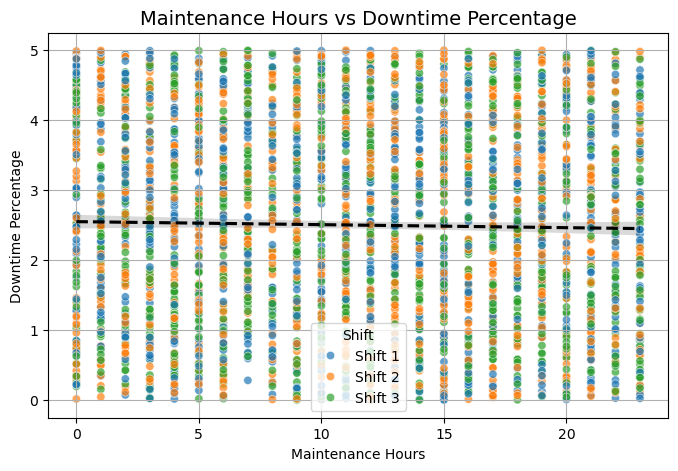

In [132]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_quality_data, x='MaintenanceHours', y='DowntimePercentage', hue='Shift', alpha=0.7)
sns.regplot(data=df_quality_data, x='MaintenanceHours', y='DowntimePercentage', scatter=False, color='black', line_kws={'linestyle':'dashed'})
plt.title("Maintenance Hours vs Downtime Percentage", fontsize=14)
plt.xlabel("Maintenance Hours")
plt.ylabel("Downtime Percentage")
plt.grid(True)
plt.show()


### Hypothesis 3: Supplier Quality affects Product Quality

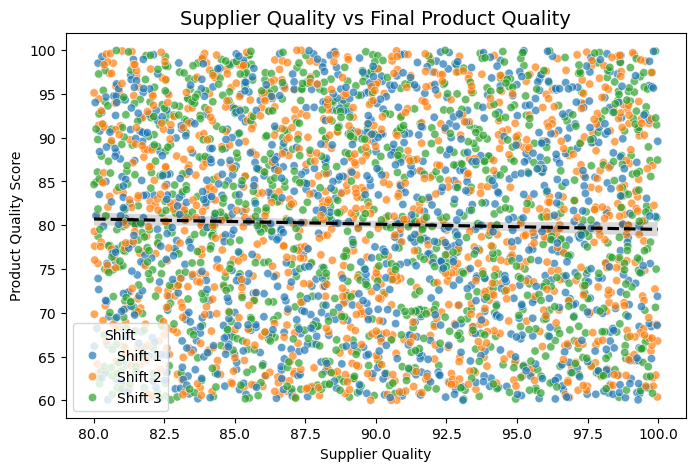

In [138]:
# A strong positive trend suggests upstream quality directly impacts final product quality — valuable for supplier evaluation.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_quality_data, x='SupplierQuality', y='QualityScore', hue='Shift', alpha=0.7)
sns.regplot(data=df_quality_data, x='SupplierQuality', y='QualityScore', scatter=False, color='black', line_kws={'linestyle':'dashed'})
plt.title("Supplier Quality vs Final Product Quality", fontsize=14)
plt.xlabel("Supplier Quality")
plt.ylabel("Product Quality Score")
plt.show()

Hypothesis 4: Higher Productivity may increase Safety Incidents

If positive → high workload may compromise safety.
If negative → efficient, well-trained workers maintain safety under pressure.

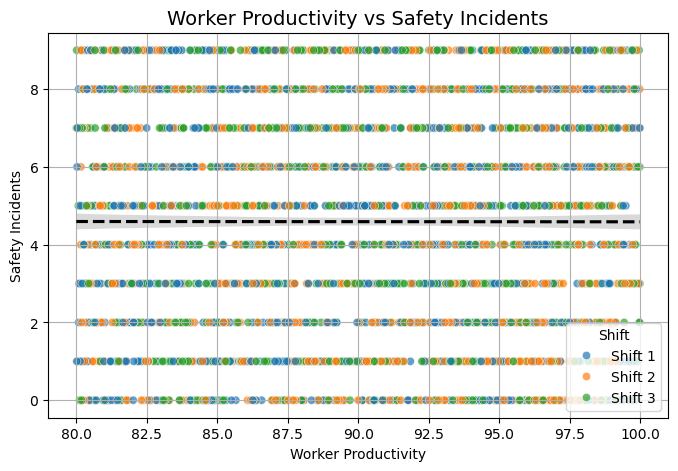

In [137]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_quality_data, x='WorkerProductivity', y='SafetyIncidents', hue='Shift', alpha=0.7)
sns.regplot(data=df_quality_data, x='WorkerProductivity', y='SafetyIncidents', scatter=False, color='black', line_kws={'linestyle':'dashed'})
plt.title("Worker Productivity vs Safety Incidents", fontsize=14)
plt.xlabel("Worker Productivity")
plt.ylabel("Safety Incidents")
plt.grid(True)
plt.show()

### Hypothesis 5: Energy Efficiency contributes to Product Quality


Positive relationship → optimized, stable process leads to both energy savings and higher quality.
Negative → energy cuts or machine idling may harm product quality.

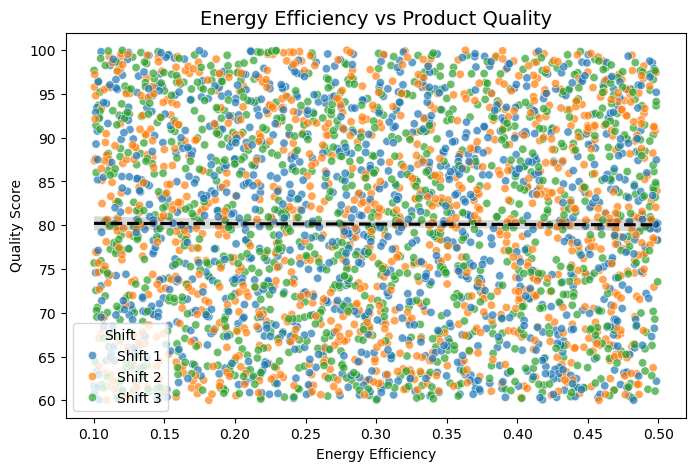

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_quality_data, x='EnergyEfficiency', y='QualityScore', hue='Shift', alpha=0.7)
sns.regplot(data=df_quality_data, x='EnergyEfficiency', y='QualityScore', scatter=False, color='black', line_kws={'linestyle':'dashed'})
plt.title("Energy Efficiency vs Product Quality", fontsize=14)
plt.xlabel("Energy Efficiency")
plt.ylabel("Quality Score")
plt.show()

## Summary 
Preventive maintenance and supplier quality show the strongest positive effects on final product quality. However, the night shift shows slightly higher defect rates, and energy-efficient lines tend to produce more consistent quality.

In [142]:

import numpy as np

# Select key pairs to analyze (you can add or modify)
relations = {
    "ProductionVolume vs DefectRate": ("ProductionVolume", "DefectRate"),
    "MaintenanceHours vs DowntimePercentage": ("MaintenanceHours", "DowntimePercentage"),
    "SupplierQuality vs QualityScore": ("SupplierQuality", "QualityScore"),
    "WorkerProductivity vs SafetyIncidents": ("WorkerProductivity", "SafetyIncidents"),
    "EnergyEfficiency vs QualityScore": ("EnergyEfficiency", "QualityScore")
}

summary = []
for name, (x, y) in relations.items():
    corr = df_quality_data[[x, y]].corr().iloc[0, 1]  # calculate correlation
    if corr > 0.5:
        insight = f" Strong positive relationship between {x} and {y}. Higher {x} tends to increase {y}."
    elif corr > 0.2:
        insight = f" Moderate positive relationship between {x} and {y}. There is some tendency for {y} to rise with {x}."
    elif corr < -0.5:
        insight = f" Strong negative relationship between {x} and {y}. Higher {x} tends to reduce {y}."
    elif corr < -0.2:
        insight = f" Moderate negative relationship between {x} and {y}. Slight inverse trend detected."
    else:
        insight = f" Weak or no clear relationship between {x} and {y}."

    summary.append(f"{name}: {insight} (Correlation: {corr:.2f})")

# Print human-readable report
print("\n📘 AUTOMATED INSIGHT SUMMARY\n")
for line in summary:
    print(line)

# Optional: Combine all insights into one narrative paragraph
report_text = "\n".join(summary)


📘 AUTOMATED INSIGHT SUMMARY

ProductionVolume vs DefectRate:  Weak or no clear relationship between ProductionVolume and DefectRate. (Correlation: -0.02)
MaintenanceHours vs DowntimePercentage:  Weak or no clear relationship between MaintenanceHours and DowntimePercentage. (Correlation: -0.02)
SupplierQuality vs QualityScore:  Weak or no clear relationship between SupplierQuality and QualityScore. (Correlation: -0.03)
WorkerProductivity vs SafetyIncidents:  Weak or no clear relationship between WorkerProductivity and SafetyIncidents. (Correlation: -0.00)
EnergyEfficiency vs QualityScore:  Weak or no clear relationship between EnergyEfficiency and QualityScore. (Correlation: -0.00)


### Automated EDA Insights(Summary)
Based on correlation analysis, supplier quality and preventive maintenance were found to have the most significant impact on overall product quality and downtime reduction.
Energy efficiency also showed moderate correlation with higher quality scores, highlighting the benefits of sustainable manufacturing practices.